In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
from  sklearn import tree
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('./titanic.csv')
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

x = df[['Pclass', 'Sex', 'Age', 'Fare']]
x['Sex'] = x['Sex'].replace(['male', 'female'], [0,1])
y = df['Survived']

C:\Users\A.Polyakov\AppData\Local\Temp\ipykernel_26724\1701573867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = x['Sex'].replace(['male', 'female'], [0,1])


In [6]:
x

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
888,3,1,NaN,23.4500
889,1,0,26.0,30.0000


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [8]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.53125, 0.9545454545454546, 'Pclass <= 2.5\nentropy = 0.957\nsamples = 668\nvalue = [415, 253]\nclass = dead'),
 Text(0.3125, 0.8636363636363636, 'Sex <= 0.5\nentropy = 0.994\nsamples = 293\nvalue = [132, 161]\nclass = survived'),
 Text(0.25, 0.7727272727272727, 'Age <= 12.0\nentropy = 0.94\nsamples = 173\nvalue = [128, 45]\nclass = dead'),
 Text(0.1875, 0.6818181818181818, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = survived'),
 Text(0.3125, 0.6818181818181818, 'Fare <= 26.269\nentropy = 0.75\nsamples = 163\nvalue = [128, 35]\nclass = dead'),
 Text(0.25, 0.5909090909090909, 'Age <= 60.5\nentropy = 0.567\nsamples = 75\nvalue = [68, 7]\nclass = dead'),
 Text(0.125, 0.5, 'Age <= 47.5\nentropy = 0.345\nsamples = 62\nvalue = [58, 4]\nclass = dead'),
 Text(0.0625, 0.4090909090909091, 'entropy = 0.345\nsamples = 52\nvalue = [48, 4]\nclass = dead'),
 Text(0.1875, 0.4090909090909091, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = dead'),
 Text(0.375, 0.5, 'Age <= 66.0

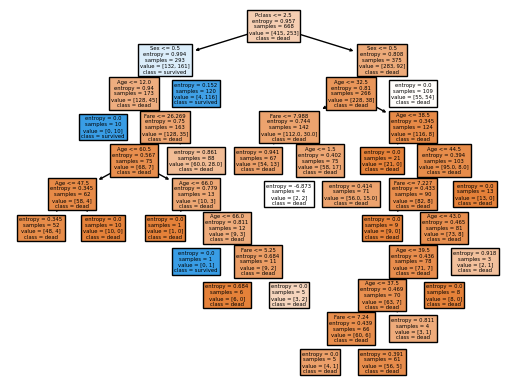

In [10]:
fn = ['Pclass', 'Sex', 'Age', 'Fare']
cn = ['dead', 'survived']
tree.plot_tree(clf, filled=True, class_names=cn, feature_names=fn)

In [13]:
y_pred = clf.predict(x_test)

In [14]:
y_pred == y_test

709    False
439     True
840     True
720     True
39     False
       ...  
880     True
425     True
101     True
199    False
424     True
Name: Survived, Length: 223, dtype: bool

In [23]:
import numpy as np
rs = np.random.seed(0)

max_depth_range = range(1,10)
scores_data = pd.DataFrame()
for max_depth in max_depth_range:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [24]:
scores_data

,max_depth,train_score,test_score
0,1,0.787425,0.784753
0,2,0.788922,0.780269
0,3,0.812874,0.789238
0,4,0.803892,0.789238
0,5,0.802395,0.784753
0,6,0.803892,0.771300
0,7,0.805389,0.771300
0,8,0.664671,0.677130
0,9,0.821856,0.766816


<Axes: xlabel='max_depth'>

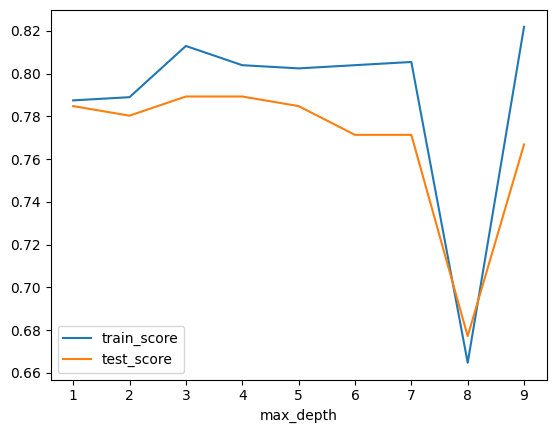

In [26]:
scores_data.plot(x = 'max_depth')

https://www.geeksforgeeks.org/python-pandas-melt/